In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import experiment_manager as em
import far_ho as far

Data folder is C:\Users\lfranceschi\DATASETS
Experiment save directory is  C:\Users\lfranceschi\EXPERIMENTS


In [244]:
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline


In [3]:
far.utils.check()

3


In [23]:
try: ss.close()
except: pass
tf.reset_default_graph()
ss = tf.InteractiveSession()
v1 = tf.Variable([1.,3])

v2 = tf.Variable([[-1., -2], [1., -1.]])

v01 = far.get_hyperparameter('v10', [10., 21.])

lmbd = far.get_hyperparameter('lambda', 
                              initializer=tf.ones_initializer,
                             shape=v2.get_shape())

cost = tf.reduce_mean(v1**2) + tf.reduce_sum(lmbd*v2**2)

io_optim = far.MomentumOptimizer(far.get_hyperparameter('eta', 0.1), 
                                   far.get_hyperparameter('mu', .9))

io_optim_dict = io_optim.minimize(cost) 



In [26]:
io_optim_dict.dynamics

[(<tf.Variable 'Variable:0' shape=(2,) dtype=float32_ref>,
  <tf.Tensor 'sub:0' shape=(2,) dtype=float32>),
 (<tf.Variable 'Variable/Momentum:0' shape=(2,) dtype=float32_ref>,
  <tf.Tensor 'add_1:0' shape=(2,) dtype=float32>),
 (<tf.Variable 'Variable_1:0' shape=(2, 2) dtype=float32_ref>,
  <tf.Tensor 'sub_1:0' shape=(2, 2) dtype=float32>),
 (<tf.Variable 'Variable_1/Momentum:0' shape=(2, 2) dtype=float32_ref>,
  <tf.Tensor 'add_2:0' shape=(2, 2) dtype=float32>)]

In [27]:
io_optim_dict.set_init_dynamics({v1: v01})  # v1 is initialized with v01

In [28]:
oo = tf.reduce_mean(v1**2) + tf.reduce_mean(v2**2)
rhg = far.ReverseHg()
rhg.compute_gradients(oo, io_optim_dict)

optim_oo = tf.train.AdamOptimizer(.01)
ts_hy = optim_oo.apply_gradients(rhg.hgrads_hvars())

[<tf.Variable 'v10:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'lambda:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'eta:0' shape=() dtype=float32_ref>,
 <tf.Variable 'mu:0' shape=() dtype=float32_ref>]

In [30]:
tf.global_variables()

[<tf.Variable 'Variable:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'Variable_1:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'v10:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'lambda:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'eta:0' shape=() dtype=float32_ref>,
 <tf.Variable 'mu:0' shape=() dtype=float32_ref>,
 <tf.Variable 'Variable/Momentum:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'Variable_1/Momentum:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'beta1_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'beta2_power:0' shape=() dtype=float32_ref>,
 <tf.Variable 'v10/Adam:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'v10/Adam_1:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'lambda/Adam:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'lambda/Adam_1:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'eta/Adam:0' shape=() dtype=float32_ref>,
 <tf.Variable 'eta/Adam_1:0' shape=() dtype=float32_ref>,
 <tf.Variable 'mu/Adam:0' shape=() dtype=float32_ref

In [31]:
far.utils.hyperparameters()

[<tf.Variable 'v10:0' shape=(2,) dtype=float32_ref>,
 <tf.Variable 'lambda:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'eta:0' shape=() dtype=float32_ref>,
 <tf.Variable 'mu:0' shape=() dtype=float32_ref>]

In [32]:
tf.global_variables_initializer().run()
ss.run(far.utils.hyperparameters())

[array([ 10.,  21.], dtype=float32), array([[ 1.,  1.],
        [ 1.,  1.]], dtype=float32), 0.1, 0.89999998]

In [33]:
ss.run(tf.global_variables())

[array([ 1.,  3.], dtype=float32), array([[-1., -2.],
        [ 1., -1.]], dtype=float32), array([ 10.,  21.], dtype=float32), array([[ 1.,  1.],
        [ 1.,  1.]], dtype=float32), 0.1, 0.89999998, array([ 0.,  0.], dtype=float32), array([[ 0.,  0.],
        [ 0.,  0.]], dtype=float32), 0.89999998, 0.99900001, array([ 0.,  0.], dtype=float32), array([ 0.,  0.], dtype=float32), array([[ 0.,  0.],
        [ 0.,  0.]], dtype=float32), array([[ 0.,  0.],
        [ 0.,  0.]], dtype=float32), 0.0, 0.0, 0.0, 0.0]

In [34]:
def print_history():
    for h in rhg._history:
        print(h)
        print('='*20)

In [35]:
rhg.run(5)

In [36]:
print_history()

[array([ 10.,  21.], dtype=float32), array([ 0.,  0.], dtype=float32), array([[-1., -2.],
       [ 1., -1.]], dtype=float32), array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)]
[array([  9.        ,  18.89999962], dtype=float32), array([ 10.,  21.], dtype=float32), array([[-0.80000001, -1.60000002],
       [ 0.80000001, -0.80000001]], dtype=float32), array([[-2., -4.],
       [ 2., -2.]], dtype=float32)]
[array([  7.19999981,  15.11999989], dtype=float32), array([ 18.        ,  37.79999924], dtype=float32), array([[-0.46000001, -0.92000002],
       [ 0.46000001, -0.46000001]], dtype=float32), array([[-3.4000001 , -6.80000019],
       [ 3.4000001 , -3.4000001 ]], dtype=float32)]
[array([  4.85999966,  10.20600033], dtype=float32), array([ 23.39999771,  49.13999557], dtype=float32), array([[-0.06200001, -0.12400001],
       [ 0.06200001, -0.06200001]], dtype=float32), array([[-3.98000002, -7.96000004],
       [ 3.98000002, -3.98000002]], dtype=float32)]
[array([ 2.26799989,  4.762800

In [37]:
rhg.run(5)

In [38]:
print_history()

[array([ 10.,  21.], dtype=float32), array([ 0.,  0.], dtype=float32), array([[-1., -2.],
       [ 1., -1.]], dtype=float32), array([[ 0.,  0.],
       [ 0.,  0.]], dtype=float32)]
[array([  9.        ,  18.89999962], dtype=float32), array([ 10.,  21.], dtype=float32), array([[-0.80000001, -1.60000002],
       [ 0.80000001, -0.80000001]], dtype=float32), array([[-2., -4.],
       [ 2., -2.]], dtype=float32)]
[array([  7.19999981,  15.11999989], dtype=float32), array([ 18.        ,  37.79999924], dtype=float32), array([[-0.46000001, -0.92000002],
       [ 0.46000001, -0.46000001]], dtype=float32), array([[-3.4000001 , -6.80000019],
       [ 3.4000001 , -3.4000001 ]], dtype=float32)]
[array([  4.85999966,  10.20600033], dtype=float32), array([ 23.39999771,  49.13999557], dtype=float32), array([[-0.06200001, -0.12400001],
       [ 0.06200001, -0.06200001]], dtype=float32), array([[-3.98000002, -7.96000004],
       [ 3.98000002, -3.98000002]], dtype=float32)]
[array([ 2.26799989,  4.762800

In [39]:
ss.run(far.utils.hypergradients())

[array([ 0.00850303,  0.01785634], dtype=float32),
 array([[ 0.20626384,  0.82505536],
        [ 0.20626384,  0.20626384]], dtype=float32),
 135.57565,
 25.722061]

In [40]:
ss.run(far.utils.lagrangian_multipliers())

[array([ 0.00850303,  0.01785634], dtype=float32),
 array([ 0.06717408,  0.14106545], dtype=float32),
 array([[-0.16844368, -0.33688736],
        [ 0.16844368, -0.16844368]], dtype=float32),
 array([[-0.03549819, -0.07099639],
        [ 0.03549819, -0.03549819]], dtype=float32)]

In [307]:
# ss.run(ts_hy)  # perform an hypergradient descent step....
# print(ss.run(far.utils.hyperparameters()))
# print(ss.run(oo))

In [24]:
tf.get_collection(far.GraphKeys.HYPERGRADIENTS)

[<tf.Tensor 'add_3_1/gradients_3/add_3_1/Vectorization_2/Reshape_grad/Reshape:0' shape=(2,) dtype=float32>,
 <tf.Variable 'add_3/lambda/hypergradient:0' shape=(2, 2) dtype=float32_ref>,
 <tf.Variable 'add_3/eta/hypergradient:0' shape=() dtype=float32_ref>,
 <tf.Variable 'add_3/mu/hypergradient:0' shape=() dtype=float32_ref>]

## check with some other initialization hyperparameters

In [307]:
try: ss.close()
except: pass
tf.reset_default_graph()
ss = tf.InteractiveSession()
v1 = tf.Variable([1.,3])

v2 = tf.Variable([[-1., -2], [10., -1.]])

std_dev = far.get_hyperparameter('stddev', 1.)
# mean = far.get_hyperparameter('mean', 1.)
mean = 0.
v01 = tf.random_normal(shape=v1.get_shape(), mean=mean, stddev=std_dev)

lmbd = far.get_hyperparameter('lambda', 
                              initializer=tf.ones_initializer,
                             shape=v2.get_shape())

cost = tf.reduce_mean(v1**2) + tf.reduce_sum(lmbd*v2**2)

io_optim = far.MomentumOptimizer(far.get_hyperparameter('eta', 0.1), 
                                   far.get_hyperparameter('mu', .9))
oo = tf.reduce_mean(v1**4) # + tf.reduce_mean(v2**2)

In [308]:
farho = far.HyperOptimizer()

In [309]:
farho.minimize(oo, tf.train.AdamOptimizer(0.001), cost, io_optim, init_dynamics_dict={v1: v01},
               hyper_list=[std_dev])  # ok this is quite right.... 
# forgot to set init_dynamics

<bound method HyperOptimizer.run of <far_ho.hyperparameters.HyperOptimizer object at 0x000000001C8AD320>>

In [310]:
tf.global_variables_initializer().run()

In [311]:
farho.run(10)
print(ss.run(far.utils.hypergradients()))
print(ss.run(far.utils.hyperparameters()))
print(ss.run(oo))

[-0.2543641]
[1.001, array([[ 1.,  1.],
       [ 1.,  1.]], dtype=float32), 0.1, 0.89999998]
0.0713477


In [312]:
def _rr():
    farho.run(5)
    return ss.run(oo)

In [313]:
res  = [_rr() for _ in range(1000)]

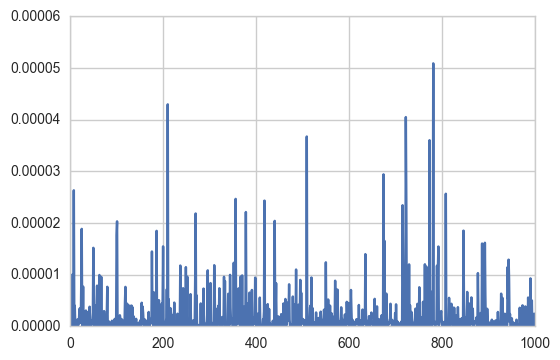

In [314]:
plt.plot(res)

In [315]:
# ookk looks like its oalll right 

In [316]:
std_dev.eval()

1.0060654

In [306]:
mean.eval()

AttributeError: 'float' object has no attribute 'eval'